### Задача

Для заданного набора данных (по Вашему варианту) постройте модели классификации или регрессии (в зависимости от конкретной задачи,
рассматриваемой в наборе данных). Для построения моделей используйте методы 1 и 2 (по варианту для Вашей группы).
Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик).

1. Дерево решений
2. Случайный лес

### Предобработка данных


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('world_happiness_report.csv')

print(data.head())

print("\nИнформация о датасете:")
print(data.info())
print("\nПропущенные значения:")
print(data.isnull().sum())
print("\nОписательная статистика:")
print(data.describe())

  Country  Year  Happiness_Score  GDP_per_Capita  Social_Support  \
0   China  2022             4.39        44984.68            0.53   
1      UK  2015             5.49        30814.59            0.93   
2  Brazil  2009             4.65        39214.84            0.03   
3  France  2019             5.20        30655.75            0.77   
4   China  2022             7.28        30016.87            0.05   

   Healthy_Life_Expectancy  Freedom  Generosity  Corruption_Perception  \
0                    71.11     0.41       -0.05                   0.83   
1                    63.14     0.89        0.04                   0.84   
2                    62.36     0.01        0.16                   0.59   
3                    78.94     0.98        0.25                   0.63   
4                    50.33     0.62        0.18                   0.92   

   Unemployment_Rate  ...  Public_Trust  Mental_Health_Index  \
0              14.98  ...          0.34                76.44   
1              19.

Заполним пропуски в данных

In [3]:
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

print(data.isnull().sum())

Country                      0
Year                         0
Happiness_Score              0
GDP_per_Capita               0
Social_Support               0
Healthy_Life_Expectancy      0
Freedom                      0
Generosity                   0
Corruption_Perception        0
Unemployment_Rate            0
Education_Index              0
Population                   0
Urbanization_Rate            0
Life_Satisfaction            0
Public_Trust                 0
Mental_Health_Index          0
Income_Inequality            0
Public_Health_Expenditure    0
Climate_Index                0
Work_Life_Balance            0
Internet_Access              0
Crime_Rate                   0
Political_Stability          0
Employment_Rate              0
dtype: int64


In [4]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['Country_encoded'] = encoder.fit_transform(data['Country'])

data.drop('Country', axis=1, inplace=True)

Проверка данных на выбросы и аномалии

Happiness_Score              1.000000
Freedom                      0.025273
Political_Stability          0.018827
GDP_per_Capita               0.016324
Work_Life_Balance            0.016085
Public_Trust                 0.015138
Corruption_Perception        0.015096
Life_Satisfaction            0.014920
Healthy_Life_Expectancy      0.012658
Year                         0.009508
Social_Support               0.007505
Crime_Rate                   0.003758
Internet_Access              0.003275
Education_Index              0.002752
Climate_Index               -0.001834
Public_Health_Expenditure   -0.003977
Employment_Rate             -0.004209
Generosity                  -0.004796
Urbanization_Rate           -0.004861
Country_encoded             -0.009397
Mental_Health_Index         -0.013628
Population                  -0.021352
Income_Inequality           -0.022347
Unemployment_Rate           -0.025534
Name: Happiness_Score, dtype: float64


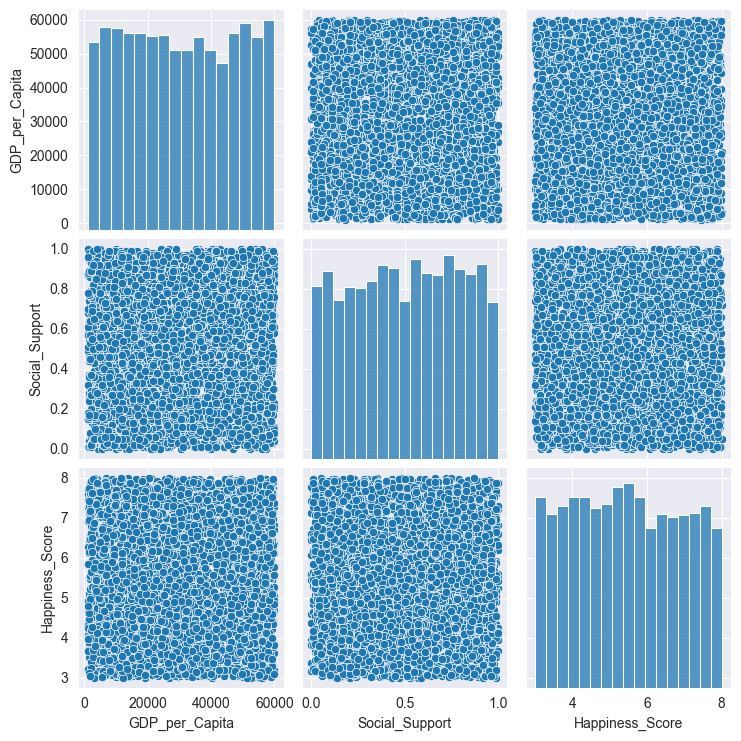

In [10]:
corr_matrix = data.corr()
print(corr_matrix['Happiness_Score'].sort_values(ascending=False))

import seaborn as sns
sns.pairplot(data[['GDP_per_Capita', 'Social_Support', 'Happiness_Score']])

In [5]:
X = data.drop('Happiness_Score', axis=1)
y = data['Happiness_Score']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Построение моделей дерева решений и случайного леса

In [6]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

In [7]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)

In [19]:
from sklearn.metrics import mean_absolute_error, r2_score

print("Decision Tree:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_tree):.3f}")

print("\nRandom Forest:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_forest):.3f}")

Decision Tree:
MAE: 1.291

Random Forest:
MAE: 1.262


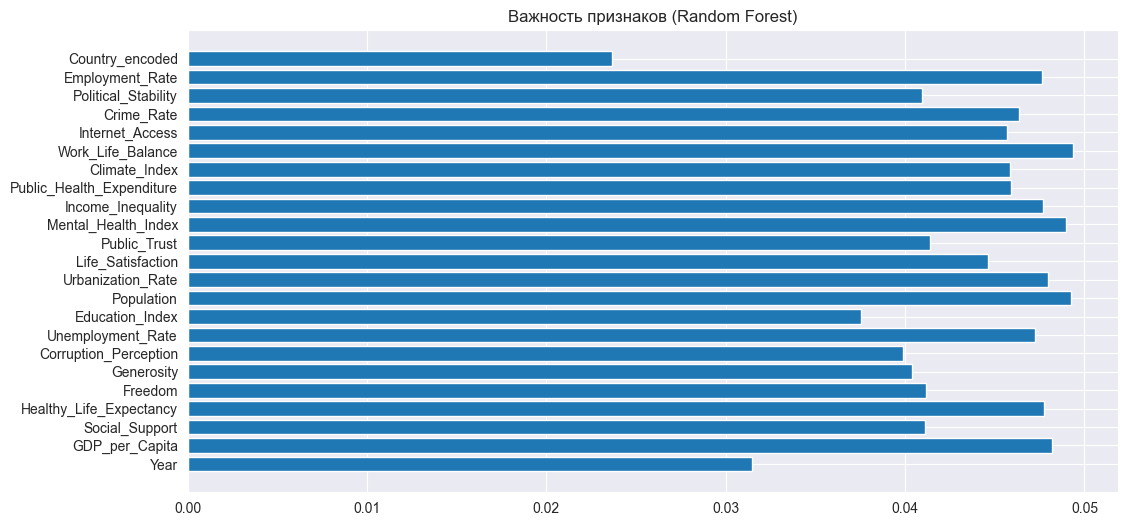

In [9]:
import matplotlib.pyplot as plt

feature_importances = forest_model.feature_importances_
features = X.columns

plt.figure(figsize=(12, 6))
plt.barh(features, feature_importances)
plt.title("Важность признаков (Random Forest)")
plt.show()

Теперь можно построить более точные модели, используя только наиболее значимые признаки

In [12]:
selected_features = ['Employment_Rate', 'Crime_Rate', 'Internet_Access', 'Work_Life_Balance', 'Mental_Health_Index', 'Population', 'GDP_per_Capita']
X = data[selected_features]
y = data['Happiness_Score']

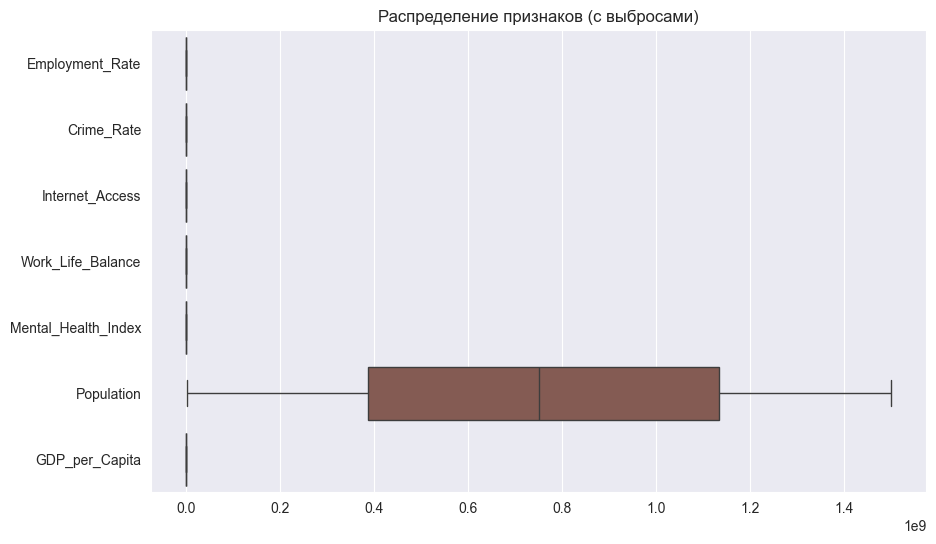

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=X[selected_features], orient='h')
plt.title("Распределение признаков (с выбросами)")
plt.show()

In [14]:
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

# Фильтрация выбросов
X_filtered = X[~((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)]
y_filtered = y[X_filtered.index]

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3, random_state=42)

# Дерево решений
tree_model = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_model.fit(X_train, y_train)

# Случайный лес
forest_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
forest_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=42)

In [18]:
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    median_absolute_error,
    explained_variance_score,
    max_error
)

def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name} Metrics:")
    print(f"- MAE: {mean_absolute_error(y_true, y_pred):.3f}")
    print(f"- MSE: {mean_squared_error(y_true, y_pred):.3f}")
    print(f"- RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.3f}")
    print(f"- MedAE: {median_absolute_error(y_true, y_pred):.3f}")
    print(f"- Explained Variance: {explained_variance_score(y_true, y_pred):.3f}")
    print(f"- Max Error: {max_error(y_true, y_pred):.3f}")

# Для дерева
evaluate_model(y_test, y_pred_tree, "Decision Tree")

# Для леса
evaluate_model(y_test, y_pred_forest, "Random Forest")


Decision Tree Metrics:
- MAE: 1.291
- MSE: 2.277
- RMSE: 1.509
- MedAE: 1.262
- Explained Variance: -0.105
- Max Error: 4.260

Random Forest Metrics:
- MAE: 1.262
- MSE: 2.123
- RMSE: 1.457
- MedAE: 1.242
- Explained Variance: -0.031
- Max Error: 2.793
